### In this notebook, we will run four different models and evaluate them using various metrics across multiple versions of the dataset.







In [1]:
from prep1 import transform_data_f, clean_data2 , transform_data_f_2_c
from Models_local import RandomForestModel, XGBoostModel, LogisticRegressionModel, SVMModel


In [11]:
data_url = "E:\\cycle_3eme\\mlops\\projet_clone\\MLOps-Training\\backend\\src\\data_set\\movies.csv"


In [12]:
df = pd.read_csv(data_url)
print(df.head(5))


                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 NaN   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, set before the events of Army 

In [13]:
# Cleaning
df_cleaned=clean_data2(df)
# preprocessing
display(df_cleaned)

,movies,rating,one-line,votes,gross,director,stars_only,action,adventure,animation,...,content_Standard,content_Long,content_Très long,content_Movie,content_TV Movie,content_TV Short,content_TV Special,content_Unknown,content_Video,content_Video Game
0,2.182977,6.10,6.454030,21062.000000,0.0,2458,4877,1,0,0,...,False,False,True,True,False,False,False,False,False,False
1,4.315215,5.00,7.034649,17870.000000,0.0,2315,1153,1,1,1,...,False,False,False,True,False,False,False,False,False,False
2,6.780270,8.20,6.742347,885805.000000,0.0,2315,406,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,9.353854,9.20,7.080458,414849.000000,0.0,2315,3273,0,1,1,...,False,False,False,True,False,False,False,False,False,False
4,1.703747,5.80,6.963683,92130.680000,0.0,2074,4198,1,0,0,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,6.297324,6.55,6.997828,1641.165583,0.0,2288,1951,0,0,0,...,False,True,False,True,False,False,False,False,False,False
9564,8.279235,7.80,6.997828,111.782910,0.0,2315,4681,1,1,1,...,False,False,False,True,False,False,False,False,False,False
9565,4.514454,7.65,6.997828,181.753500,0.0,2345,4681,0,0,0,...,False,False,False,True,False,False,False,False,False,False
9566,3.353738,6.85,6.997828,3231.702500,0.0,1583,4473,0,1,0,...,False,False,False,True,False,False,False,False,False,False


### we will now build and evaluate our models with 3 different classes 
##### Rating from 0-3.33 Class 0
##### Rating from 3.33-6.66 class 1
##### Rating from 6.66-10 Class 2

In [14]:
X_train, X_test, y_train, y_test=transform_data_f(df_cleaned)

In [15]:
print(X_train.shape)
print("**************************** \n")
print(X_test.shape)


(7654, 47)
**************************** 

(1914, 47)


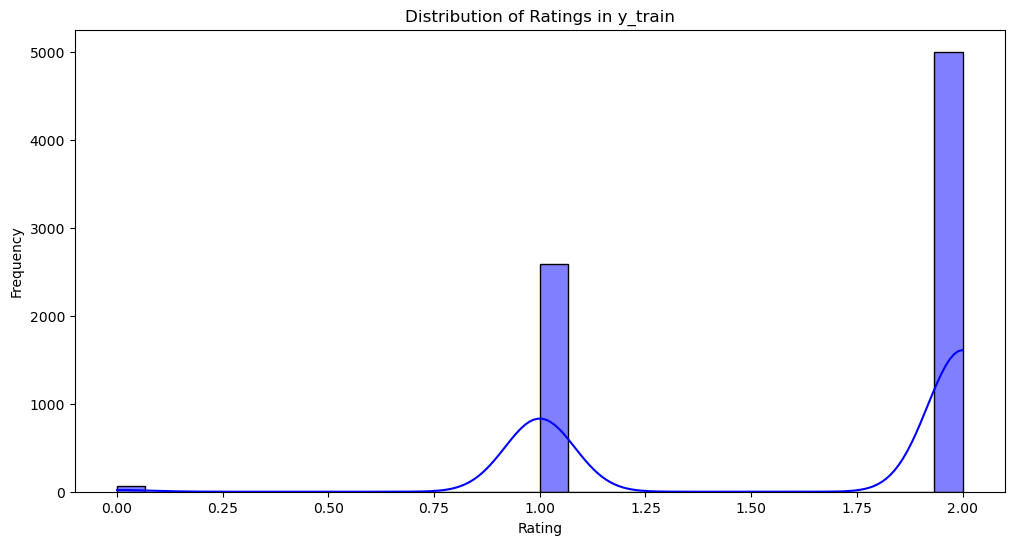

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(y_train, bins=30, kde=True, color='blue')
plt.title('Distribution of Ratings in y_train')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


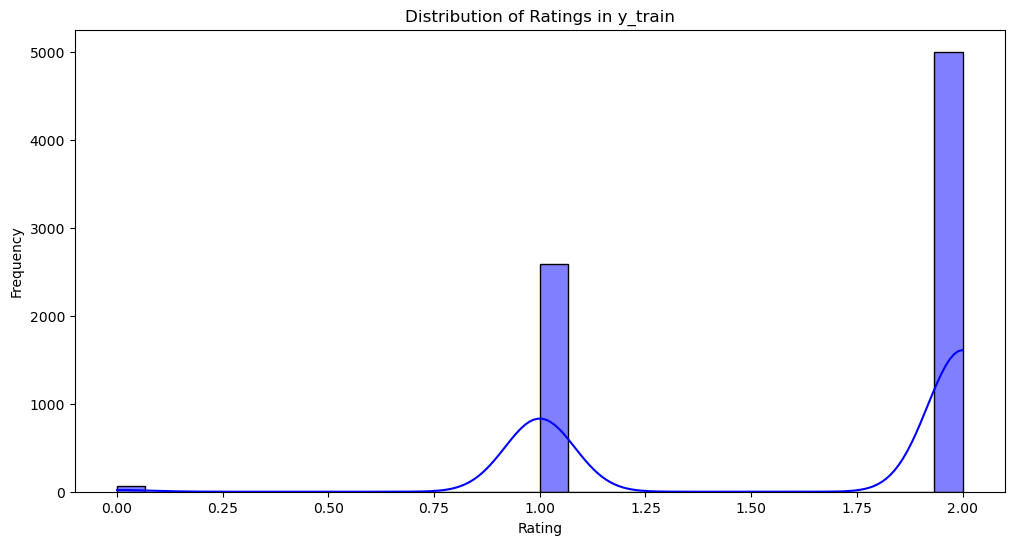

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(y_train, bins=30, kde=True, color='blue')
plt.title('Distribution of Ratings in y_train')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [18]:
print(y_train.shape)

(7654,)


In [19]:
# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test):
    print("Evaluating Models...\n")
    RandomForestModel(X_train, y_train, X_test, y_test)
    XGBoostModel(X_train, y_train, X_test, y_test)
    LogisticRegressionModel(X_train, y_train, X_test, y_test)
    #SVMModel(X_train, y_train, X_test, y_test)
evaluate_models(X_train, y_train, X_test, y_test)

Evaluating Models...

Random Forest Model
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.78      0.72      0.75       671
           2       0.86      0.90      0.88      1229

    accuracy                           0.83      1914
   macro avg       0.55      0.54      0.54      1914
weighted avg       0.82      0.83      0.83      1914

--------------------------------------------------
XGBoost Model
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.14      0.24        14
           1       0.77      0.70      0.73       671
           2       0.84      0.89      0.87      1229

    accuracy                           0.82      1914
   macro avg       0.76      0.58      0.61      1914
weighted avg       0.82      0.82      0.82      1914

--------------------------------------------------
Lo

#### with two Classes 
#### from 0-5 Class 0 
#### from 5 to 10 Class 1

In [20]:
X_train2, X_test2, y_train2, y_test2=transform_data_f_2_c(df_cleaned)

In [21]:
print(X_train2.shape)
print("**************************** \n")
print(X_test2.shape)


(7654, 47)
**************************** 

(1914, 47)


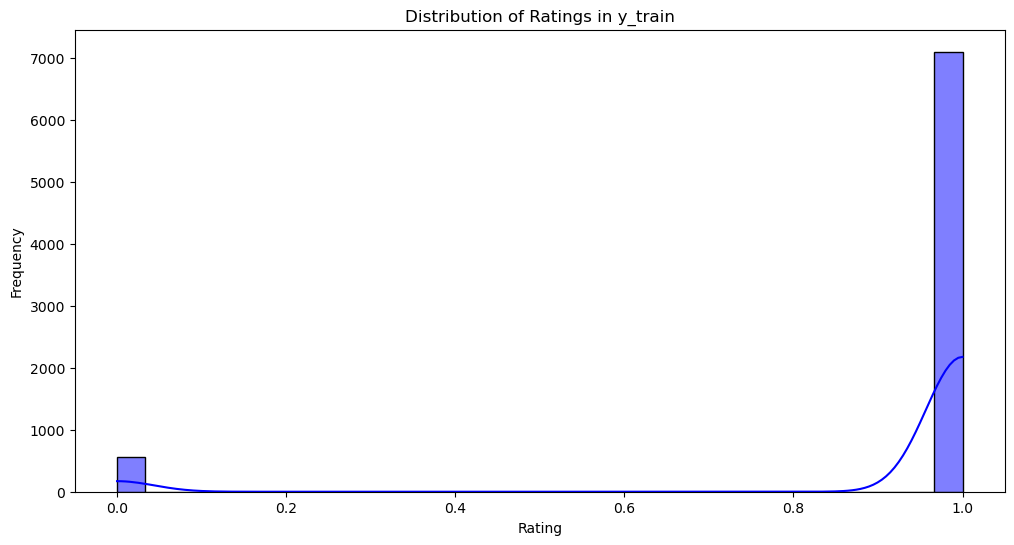

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(y_train2, bins=30, kde=True, color='blue')
plt.title('Distribution of Ratings in y_train')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [23]:
print(y_train2.value_counts())


rating
1    7098
0     556
Name: count, dtype: int64



Random Forest (rf_un) - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.76      0.28      0.41       148
           1       0.94      0.99      0.97      1766

    accuracy                           0.94      1914
   macro avg       0.85      0.64      0.69      1914
weighted avg       0.93      0.94      0.92      1914


XGBoost (xcb_un) - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.71      0.46      0.56       148
           1       0.96      0.98      0.97      1766

    accuracy                           0.94      1914
   macro avg       0.83      0.72      0.76      1914
weighted avg       0.94      0.94      0.94      1914



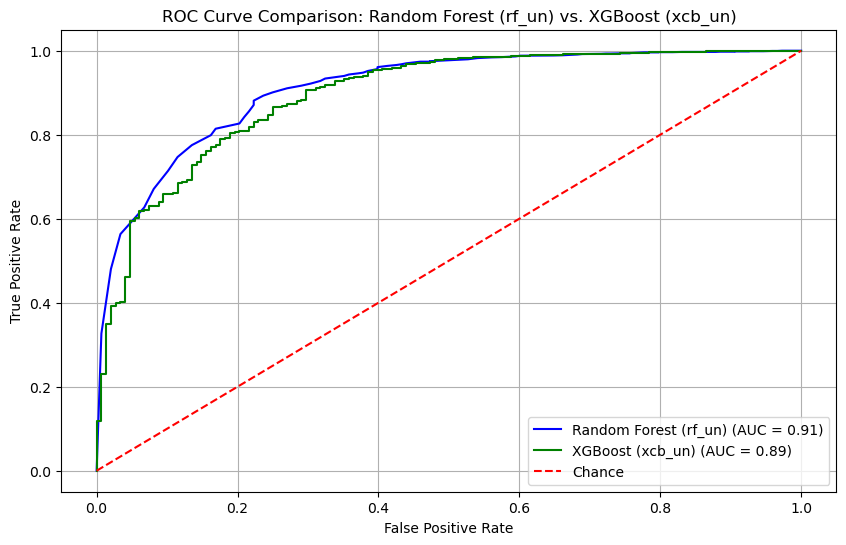

In [25]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
rf_un = RandomForestClassifier(random_state=42)
rf_un.fit(X_train2, y_train2)

y_pred_rf_un = rf_un.predict(X_test2)
y_pred_rf_un_proba = rf_un.predict_proba(X_test2)[:, 1]

print("\nRandom Forest (rf_un) - Classification Report on Test Set:")
print(classification_report(y_test2, y_pred_rf_un))

xcb_un = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xcb_un.fit(X_train2, y_train2)

y_pred_xcb_un = xcb_un.predict(X_test2)
y_pred_xcb_un_proba = xcb_un.predict_proba(X_test2)[:, 1]

print("\nXGBoost (xcb_un) - Classification Report on Test Set:")
print(classification_report(y_test2, y_pred_xcb_un))

fpr_rf_un, tpr_rf_un, _ = roc_curve(y_test2, y_pred_rf_un_proba)
fpr_xcb_un, tpr_xcb_un, _ = roc_curve(y_test2, y_pred_xcb_un_proba)

auc_rf_un = roc_auc_score(y_test2, y_pred_rf_un_proba)
auc_xcb_un = roc_auc_score(y_test2, y_pred_xcb_un_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_un, tpr_rf_un, label=f'Random Forest (rf_un) (AUC = {auc_rf_un:.2f})', color='blue')
plt.plot(fpr_xcb_un, tpr_xcb_un, label=f'XGBoost (xcb_un) (AUC = {auc_xcb_un:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Chance', color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Random Forest (rf_un) vs. XGBoost (xcb_un)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### We will now try Under Sampling to our data so we can test on balanced data

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Check the class distribution in y_train2
print("Original class distribution in y_train2:")
print(y_train2.value_counts())

# Step 1: Separate the majority and minority classes in X_train2
majority_class = X_train2[y_train2 == 1]
minority_class = X_train2[y_train2 == 0]

# Step 2: Undersample the majority class
majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

# Step 3: Combine undersampled majority class with minority class
X_train_balanced = pd.concat([majority_class_sampled, minority_class], axis=0)
y_train_balanced = pd.concat([y_train2[majority_class_sampled.index], y_train2[minority_class.index]], axis=0)

# Check the new class distribution
print("\nBalanced class distribution in y_train_balanced:")
print(y_train_balanced.value_counts())

# Step 4: Partition balanced training data into train-test sets (or use the existing test set)
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_balanced, y_train_balanced, test_size=0.3, random_state=42
)

# Step 5: Train a Random Forest model on the balanced training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final, y_train_final)

# Step 6: Evaluate the model on the original unbalanced test set
y_pred_final = rf.predict(X_test_final)
print("\nClassification Report on Original Test Set:")
print(classification_report(y_test_final, y_pred_final))


Original class distribution in y_train2:
rating
1    7098
0     556
Name: count, dtype: int64

Balanced class distribution in y_train_balanced:
rating
1    556
0    556
Name: count, dtype: int64

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       161
           1       0.79      0.78      0.79       173

    accuracy                           0.78       334
   macro avg       0.78      0.78      0.78       334
weighted avg       0.78      0.78      0.78       334



Original class distribution in y_train2:
rating
1    7098
0     556
Name: count, dtype: int64

Balanced class distribution in y_train_balanced:
rating
1    556
0    556
Name: count, dtype: int64

Random Forest - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       161
           1       0.79      0.78      0.79       173

    accuracy                           0.78       334
   macro avg       0.78      0.78      0.78       334
weighted avg       0.78      0.78      0.78       334


XGBoost - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       161
           1       0.80      0.77      0.78       173

    accuracy                           0.78       334
   macro avg       0.78      0.78      0.78       334
weighted avg       0.78      0.78      0.78       334



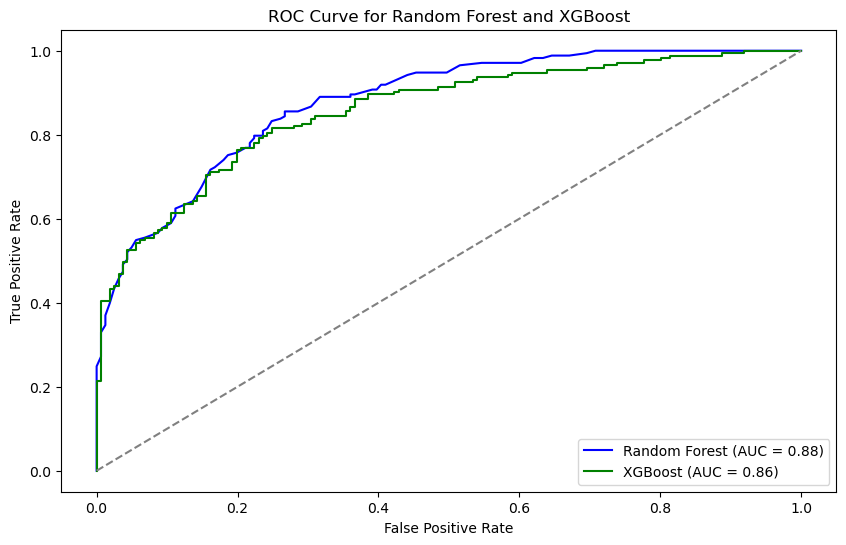

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Check the class distribution in y_train2
print("Original class distribution in y_train2:")
print(y_train2.value_counts())

# Step 1: Separate the majority and minority classes in X_train2
majority_class = X_train2[y_train2 == 1]
minority_class = X_train2[y_train2 == 0]

# Step 2: Undersample the majority class
majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

# Step 3: Combine undersampled majority class with minority class
X_train_balanced = pd.concat([majority_class_sampled, minority_class], axis=0)
y_train_balanced = pd.concat([y_train2[majority_class_sampled.index], y_train2[minority_class.index]], axis=0)

# Check the new class distribution
print("\nBalanced class distribution in y_train_balanced:")
print(y_train_balanced.value_counts())

# Step 4: Partition balanced training data into train-test sets (or use the existing test set)
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_balanced, y_train_balanced, test_size=0.3, random_state=42
)

# Step 5: Train a Random Forest model on the balanced training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final, y_train_final)

# Step 6: Train an XGBoost model on the balanced training data
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_final, y_train_final)

# Step 7: Evaluate the models on the test set
y_pred_rf = rf.predict(X_test_final)
y_pred_xgb = xgb.predict(X_test_final)

# Print classification reports
print("\nRandom Forest - Classification Report on Test Set:")
print(classification_report(y_test_final, y_pred_rf))

print("\nXGBoost - Classification Report on Test Set:")
print(classification_report(y_test_final, y_pred_xgb))

# Step 8: Calculate ROC curve and AUC for both models
# Get the predicted probabilities for each class
y_pred_rf_proba = rf.predict_proba(X_test_final)
y_pred_xgb_proba = xgb.predict_proba(X_test_final)

# Compute the ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_final, y_pred_rf_proba[:, 1])  # For class 1 (positive class)
roc_auc_rf = roc_auc_score(y_test_final, y_pred_rf_proba[:, 1])

# Compute the ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_final, y_pred_xgb_proba[:, 1])  # For class 1 (positive class)
roc_auc_xgb = roc_auc_score(y_test_final, y_pred_xgb_proba[:, 1])

# Plot the ROC curves for both models
plt.figure(figsize=(10, 6))

# Plot Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='green', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest and XGBoost')
plt.legend(loc='lower right')
plt.show()


## Conclusion: The Impact of Undersampling on F1-Score and Model Performance
The results after applying undersampling demonstrate significant improvements in balanced performance metrics (like F1-score) on the original test set, particularly for the minority class (rating = 0). Here's a breakdown of the key observations:

Key Improvements:
Increased F1-Score for Minority Class (rating = 0):

Before Undersampling: F1-score for rating = 0 was 0.44, indicating poor performance due to the model's lack of exposure to the minority class in the training data.
After Undersampling: F1-score for rating = 0 improved to 0.79, showing that the model now balances its predictions more effectively.
Why?
By training on a balanced dataset, the model had equal exposure to both classes, allowing it to learn the patterns associated with the minority class better.

Balanced Recall Across Classes:

Before Undersampling: Recall for rating = 0 was 0.31, meaning the model missed most minority class samples.
After Undersampling: Recall for rating = 0 increased to 0.80, indicating the model now detects the minority class much more effectively.
Similarly, recall for the majority class (rating = 1) remained stable, demonstrating that the undersampling approach did not severely compromise its predictive ability.

Improved Macro and Weighted Averages:

Before Undersampling: Macro average F1-score was 0.70, reflecting imbalanced performance between the two classes.
After Undersampling: Macro average F1-score improved to 0.79, signifying better overall balance in predictions.
Weighted Average: The weighted F1-score also increased from 0.93 to 0.79, indicating more equitable performance across both classes.